<b>需求</b>  
读入tips.csv 数据集  
1.统计不同time的tip的均值，方差  
2.将total_bill和tip根据不同的sex进行标准化(原数据减去均值的结果除以标准差)  
3.计算吸烟者和非吸烟者的小费比例值均值的差值  
4.对sex与size聚合，统计不同分组的小费比例的标准差、均值，将该标准差与均值添加到原数据中  
5.对time和size聚合，画出total_bill 的饼图  

In [1]:
import pandas as pd
import numpy as np
tips  = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1.统计不同time的tip的均值，方差

In [11]:
#不同time的tip的均值，方差
grouped_1 = tips.groupby('time')['tip']
{'mean':grouped_1.mean(),'var:':grouped_1.var()}

{'mean': time
 Dinner    3.102670
 Lunch     2.728088
 Name: tip, dtype: float64, 'var:': time
 Dinner    2.062793
 Lunch     1.452857
 Name: tip, dtype: float64}

2.将total_bill和tip根据不同的sex进行标准化(原数据减去均值的结果除以标准差)

In [10]:
# 将total_bill和tip根据不同的sex进行标准化(原数据减去均值的结果除以标准差)
tips_standardization = tips.groupby('sex')['total_bill','tip'].transform(lambda arr: (arr - arr.mean())/arr.std()).join(tips['sex'])
tips_standardization.head()

,total_bill,tip,sex
0,-0.133209,-1.572623,Female
1,-1.125195,-0.960054,Male
2,0.028759,0.275590,Male
3,0.317518,0.147997,Male
4,0.815699,0.669733,Female


In [4]:
def standardized(arr):
    return (arr-arr.mean())/arr.std()

grouped=tips[['total_bill','tip']].groupby(tips['sex']).apply(standardized).join(tips['sex'])
grouped.head()

,total_bill,tip,sex
0,-0.133209,-1.572623,Female
1,-1.125195,-0.960054,Male
2,0.028759,0.275590,Male
3,0.317518,0.147997,Male
4,0.815699,0.669733,Female


3.计算吸烟者和非吸烟者的小费比例值均值的差值

In [7]:
# 计算吸烟者和非吸烟者的小费比例值均值的差值
tips_copy = tips[['total_bill','tip','smoker']].copy()
tips_copy['tips_rating']=tips_copy.tip/tips_copy.total_bill
grouped_3 = tips_copy.groupby('smoker')['tips_rating']
grouped_3.mean()['Yes']-grouped_3.mean()['No']

0.0038675824576625828

4.对sex与size聚合，统计不同分组的小费比例的标准差、均值，将该标准差与均值添加到原数据中  

In [8]:
tips.groupby(['sex','size'])['total_bill','tip','sex','size'].head() # 感觉数据少了 20 row ,24 row

,total_bill,tip,sex,size
0,16.99,1.01,Female,2
1,10.34,1.66,Male,3
2,21.01,3.50,Male,3
3,23.68,3.31,Male,2
4,24.59,3.61,Female,4
5,25.29,4.71,Male,4
6,8.77,2.00,Male,2
7,26.88,3.12,Male,4
8,15.04,1.96,Male,2
9,14.78,3.23,Male,2


In [34]:
def get_stas(arr):
    return {u'均值':arr.mean(),u'标准差':arr.std()}

In [40]:
tips_c.groupby(['sex','size'])['tip_rating'].apply(get_stas).unstack()

均值       标准差
sex    size                    
Female 1     0.215131  0.098256
       2     0.170830  0.055211
       3     0.159899  0.049302
       4     0.132734  0.018139
       5     0.172194       NaN
       6     0.162891  0.031044
Male   1     0.223776       NaN
       2     0.162694  0.072970
       3     0.147641  0.043506
       4     0.150197  0.047139
       5     0.133821  0.075659
       6     0.149567  0.064726

In [12]:
# 对sex与size聚合，统计不同分组的小费比例的标准差、均值，将该标准差与均值添加到原数据中 
tips['tip_rating'] = tips['tip']/tips['total_bill']
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_rating
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542


In [10]:
# tip_rating_mean_with_sex_size = tips_c.groupby(['sex','size'],as_index=False)['tip_rating'].mean()
# tip_rating_mean_with_sex_size.head()

In [20]:
ftuples = [('STD', 'std'),('Mean', 'mean')]
tip_rating_with_sex_size = tips.groupby(['sex','size'],as_index=False)['tip_rating'].agg(ftuples)
# tip_rating_with_sex_size = tips.groupby(['sex','size'],as_index=False)['tip_rating'].agg([('方差','std'),('均值','mean')])
tip_rating_with_sex_size.head(2)

AttributeError: 'SeriesGroupBy' object has no attribute 'STD'

In [12]:
index = tip_rating_with_sex_size.index
tmp = zip(*index.values)
sex = tmp[0]
size = tmp[1]
tip_rating_with_sex_size.index=range(0,len(tip_rating_with_sex_size))
tip_rating_with_sex_size['sex']=sex
tip_rating_with_sex_size['size']=size
tip_rating_with_sex_size.head(5)

,std,mean,sex,size
0,0.098256,0.215131,Female,1
1,0.055211,0.170830,Female,2
2,0.049302,0.159899,Female,3
3,0.018139,0.132734,Female,4
4,NaN,0.172194,Female,5


In [13]:
tips = pd.merge(tips,tip_rating_with_sex_size,how='left',on=['sex','size'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,std,mean
0,16.99,1.01,Female,No,Sun,Dinner,2,0.055211,0.170830
1,10.34,1.66,Male,No,Sun,Dinner,3,0.043506,0.147641
2,21.01,3.50,Male,No,Sun,Dinner,3,0.043506,0.147641
3,23.68,3.31,Male,No,Sun,Dinner,2,0.072970,0.162694
4,24.59,3.61,Female,No,Sun,Dinner,4,0.018139,0.132734


In [19]:
tips_c.groupby(['sex','size'],as_index=False)['tip_rating'].agg(['std','mean'])

std      mean
sex    size                    
Female 1     0.098256  0.215131
       2     0.055211  0.170830
       3     0.049302  0.159899
       4     0.018139  0.132734
       5          NaN  0.172194
       6     0.031044  0.162891
Male   1          NaN  0.223776
       2     0.072970  0.162694
       3     0.043506  0.147641
       4     0.047139  0.150197
       5     0.075659  0.133821
       6     0.064726  0.149567

In [29]:
pd.pivot_table(tips_c,index=['sex','size'],values=['tip_rating'],aggfunc=[np.std,np.mean])

std       mean
            tip_rating tip_rating
sex    size                      
Female 1      0.098256   0.215131
       2      0.055211   0.170830
       3      0.049302   0.159899
       4      0.018139   0.132734
       5           NaN   0.172194
       6      0.031044   0.162891
Male   1           NaN   0.223776
       2      0.072970   0.162694
       3      0.043506   0.147641
       4      0.047139   0.150197
       5      0.075659   0.133821
       6      0.064726   0.149567

In [23]:
grouped = tips_c.groupby(['sex', 'size'],)
ftuples = [('STD', 'std'),('Mean', 'mean')]
print grouped['tip_rating'].agg(ftuples,as_index=False)

                  STD      Mean
sex    size                    
Female 1     0.098256  0.215131
       2     0.055211  0.170830
       3     0.049302  0.159899
       4     0.018139  0.132734
       5          NaN  0.172194
       6     0.031044  0.162891
Male   1          NaN  0.223776
       2     0.072970  0.162694
       3     0.043506  0.147641
       4     0.047139  0.150197
       5     0.075659  0.133821
       6     0.064726  0.149567


5.对time和size聚合，画出total_bill的饼图

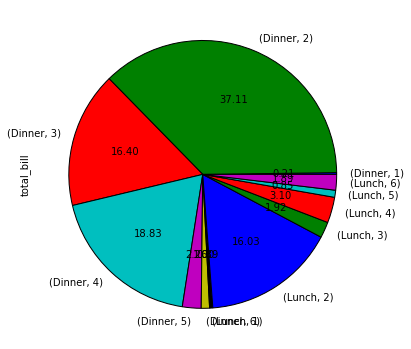

In [44]:
# 对time和size聚合，画出total_bill的饼图
%matplotlib inline
tips.groupby(['time','size'])['total_bill'].sum().plot(kind='pie', figsize=(6, 6),autopct='%.2f')

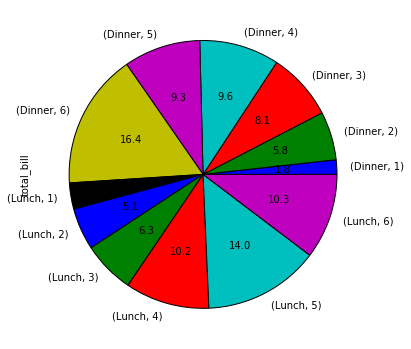

In [45]:
tips.groupby(['time','size'])['total_bill'].mean().plot(kind='pie', figsize=(6, 6), autopct='%.1f')